In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Arc
from typing import Tuple, Optional


NameError: name 'cos_value' is not defined

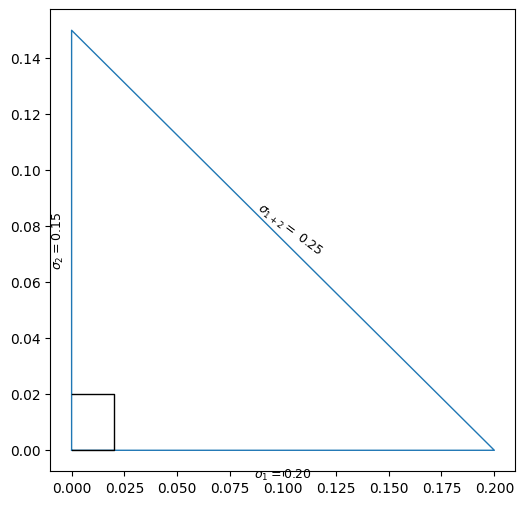

In [2]:
def draw_triangle(cos_theta, x, y):
    """
    Draws a triangle from a dictionary of vertices and a specified cos(θ).
    Computes and labels angle θ at vertex A, along with cos(θ) and σ.
    Draws a circular angle marker if θ ≠ 90°, or a square if it is.
    
    Args:
        cos_theta (float): cosine of the angle θ at vertex A, between sides AB and AC.
    """

    vertices = {
        'A': np.array([0, 0]),
        'B': np.array([x, 0]),
        'C': np.array([0, y])
    }

    # Extract points
    A, B, C = vertices['A'], vertices['B'], vertices['C']

    # Compute vectors from vertex A
    AB = B - A
    AC = C - A

    # Compute θ (angle at A)
    dot_product = np.dot(AB, AC)
    magnitude_product = np.linalg.norm(AB) * np.linalg.norm(AC)
    cos_theta = dot_product / magnitude_product
    theta = np.degrees(np.arccos(cos_theta))

    # --- Plot triangle ---
    plt.figure(figsize=(6, 6))
    plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], linewidth=1)

    # Label vertices
    # for name, point in vertices.items():
        # plt.text(point[0] + 0.1, point[1] + 0.1, f"{name} {tuple(point)}", fontsize=10)

    # Label sides
    plt.text((A[0]+B[0])/2, (A[1]+B[1])/2 - 0.01,
             f"$\sigma_1=${np.linalg.norm(B - A):.02f}", ha='center', fontsize=9)
    plt.text((A[0]+C[0])/2 - 0.01, (A[1]+C[1])/2,
             f"$\sigma_2=${np.linalg.norm(C - A):.02f}", va='center', rotation=90, fontsize=9)

    # Compute hypotenuse midpoint and rotation angle
    midpoint = (B + C) / 2
    z = np.degrees(np.arctan2(C[1] - B[1], C[0] - B[0]))
    # Build a unit normal from the angle (rotate +90°): n = (-sin θ, cos θ)
    offset_angle = np.radians(z)
    n_unit = np.array([-np.sin(offset_angle), np.cos(offset_angle)])
    
    # Choose offset distance in DATA units (increase to move further)
    offset = -0.005
    label_pos = midpoint + offset * n_unit    

    # Label hypotenuse along slope
    plt.text(label_pos[0], label_pos[1], f"$\sigma_{{1+2}}=$ {np.linalg.norm(C - B):.02f}",
             rotation=z + 180, rotation_mode='anchor',
             fontsize=9, color='black', ha='center', va='center',
             bbox=dict(facecolor='white', edgecolor='none', pad=-2)
            )

    # --- Draw angle marker at A ---
    if abs(theta - 90) < 0.5:
        # Right angle square
        square_size = 0.02
        plt.plot([A[0], A[0] + square_size, A[0] + square_size, A[0]],
                 [A[1], A[1], A[1] + square_size, A[1] + square_size],
                 'k-', lw=1)
    else:
        # Circular arc for angle marker
        radius = 0.8
        # Compute direction of sides for arc angles
        start_angle = np.degrees(np.arctan2(AB[1], AB[0]))
        end_angle = np.degrees(np.arctan2(AC[1], AC[0]))
        # Normalize the arc to go the smaller way around
        if end_angle < start_angle:
            start_angle, end_angle = end_angle, start_angle
        arc = Arc(A, 2*radius, 2*radius, angle=0,
                  theta1=start_angle, theta2=end_angle, color='red', lw=1.5)
        plt.gca().add_patch(arc)

    # --- Label the computed angle, cosine, and sigma ---
    # plt.text(A[0] + 0.6, A[1] + 0.4, f"θ = {theta:.1f}°", fontsize=12, color='red')
    # plt.text(A[0] + 1.0, A[1] + 0.5, f"cos(θ) = {cos_theta:.2f}", fontsize=12, color='purple')
    # plt.text(A[0] + 1.0, A[1] + 1.0, f"σ = {cos_theta:.2f}", fontsize=12, color='green')
    plt.text(0.022, 0.022, f"cos(θ) = ρ = {cos_value:.3f}\nθ={float(angle_A_deg):.0f}°", fontsize=9, color='black')

    # --- Final styling ---
    plt.axis('equal')
    plt.axis('off')
    # plt.title('Triangle with Computed θ, cos(θ), and σ', fontsize=14)
    plt.show()

# Draw  triangle
draw_triangle(0.0, 0.2, 0.15)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def draw_triangle(cos_theta, x, y, above_x_axis=True):
    """
    Draws a triangle with vertices:
      A = (0, 0)
      B = (x, 0)
      C computed so that |AC| = y and the angle at A between AB and AC has cosine = cos_theta.

    Args:
        cos_theta (float): cos(θ) at vertex A, between sides AB and AC. Will be clamped to [-1, 1].
        x (float): length of AB (B is placed at (x, 0)).
        y (float): length of AC.
        above_x_axis (bool): if True, place C with positive sine (above the x-axis); if False, below.
    """

    # --- Geometry at A ---
    # Clamp for numeric safety
    ct = float(np.clip(cos_theta, -1.0, 1.0))
    theta = float(np.degrees(np.arccos(ct)))
    # Choose sign of sin(θ) based on requested side of x-axis
    st = np.sqrt(max(0.0, 1.0 - ct*ct))
    if not above_x_axis:
        st = -st

    # Vertices
    A = np.array([0.0, 0.0])
    B = np.array([float(x), 0.0])
    C = A + float(y) * np.array([ct, st])

    # --- Plot triangle ---
    plt.figure(figsize=(6, 6))
    plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], linewidth=1)

    # Side labels
    plt.text((A[0]+B[0])/2, (A[1]+B[1])/2 - 0.01,
             f"$\\sigma_1$={np.linalg.norm(B - A):.02f}", ha='center', fontsize=9)

    # side label (BC)
    midpoint = (B + C) / 2
    z_angle = np.degrees(np.arctan2(C[1] - B[1], C[0] - B[0]))
    offset_angle = np.radians(z_angle)
    n_unit = np.array([-np.sin(offset_angle), np.cos(offset_angle)])
    label_pos = midpoint - 0.005 * n_unit
    plt.text(label_pos[0], label_pos[1],
             f"$\\sigma_{{1+2}}$={np.linalg.norm(C - B):.02f}",
             rotation=z_angle+180, rotation_mode='anchor',
             fontsize=9, color='black', ha='center', va='center',
             bbox=dict(facecolor='white', edgecolor='none', pad=-2))


    # side label (AC)
    midpoint = (A + C) / 2
    z_angle = np.degrees(np.arctan2(C[1] - A[1], C[0] - A[0]))
    offset_angle = np.radians(z_angle)
    n_unit = np.array([-np.sin(offset_angle), np.cos(offset_angle)])
    label_pos = midpoint + 0.005 * n_unit
    plt.text(label_pos[0], label_pos[1],
             f"$\\sigma_2$={y:.02f}",
             rotation=z_angle, rotation_mode='anchor',
             fontsize=9, color='black', ha='center', va='center',
             bbox=dict(facecolor='white', edgecolor='none', pad=-2))

    # --- Angle marker at A ---
    if np.isclose(theta, 90.0, atol=0.5):
        # Right angle square
        s = 0.02
        plt.plot([A[0], A[0] + s, A[0] + s, A[0]],
                 [A[1], A[1], A[1] + s, A[1] + s], 'k-', lw=1)
    else:
        # Arc from AB direction (0°) to AC direction (atan2 of AC)
        radius = 0.02
        start_angle = 0.0  # AB points along +x
        end_angle = np.degrees(np.arctan2(C[1] - A[1], C[0] - A[0]))
        # Ensure arc goes the smaller way around
        a1, a2 = sorted([start_angle, end_angle])
        arc = Arc(A, 2*radius, 2*radius, angle=0, theta1=a1, theta2=a2,
                  color='black', lw=1.5)
        plt.gca().add_patch(arc)

    # --- Angle and cosine label near A ---
    desc_label = f"cos(θ)=ρ={ct:.3f}\nθ={theta:.0f}°"
    plt.text(0.02, 0.02, desc_label,
             fontsize=9, color='black')

    # --- Final styling ---
    plt.axis('equal')
    plt.axis('off')
    plt.show()


# Example
draw_triangle(-.5, 0.2, 0.15)  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def draw_triangle(x, y, show_labels=True):
    """
    Draws a triangle with vertices:
        A = (0, 0)
        B = (x, 0)
        C = (x, y)
    Sides:
        A -> B
        B -> C
        A -> C
    Shows a small indicative arc at vertex B (between the +x axis and the line BC).
    """
    A = np.array([0.0, 0.0])
    B = np.array([float(x), 0.0])
    C = np.array([float(x), float(y)])

    plt.figure(figsize=(6, 6))

    def arrow(p0, p1, lw=1.2):
        plt.annotate(
            "", xy=p1, xytext=p0,
            arrowprops=dict(arrowstyle='-|>', lw=lw, shrinkA=0, shrinkB=0)
        )

    # Draw triangle sides with arrows
    arrow(A, B)  # base
    arrow(B, C)  # vertical side
    arrow(A, C)  # hypotenuse

    # --- Small indicative arc at vertex B ---
    # Angle direction depends on the sign of y
    end_angle = 90.0 if y >= 0 else -90.0
    # Small fixed-size arc, independent of triangle scale
    # radius = 0.05 * max(abs(x), abs(y), 1.0)
    # arc = Arc(B, 2*radius, 2*radius, angle=0, theta1=0, theta2=end_angle,
    #           color='black', lw=0.8)
    # plt.gca().add_patch(arc)

    # Optional angle label near the arc
    # if show_labels:
    #     offset_y = np.sign(y) * radius * 1.4
    #     plt.text(B[0] + radius * 0.7, B[1] + offset_y,
    #              f"θ={abs(end_angle):.0f}°",
    #              fontsize=9, ha='left', va='center')

    # Optional side labels
    if show_labels:
        AB = np.linalg.norm(B - A)
        BC = np.linalg.norm(C - B)
        AC = np.linalg.norm(C - A)

        plt.text((A[0]+B[0])/2, (A[1]+B[1])/2 - 0.02, f"$\\sigma_1$={AB:.02f}",
                 ha='center', va='top', fontsize=9)
        plt.text(B[0]+0.02, B[1]+y/2, f"$\\sigma_2$={BC:.02f}",
                 va='center', fontsize=9)
        mAC = (A + C) / 2
        angle_AC_deg = np.degrees(np.arctan2(C[1]-A[1], C[0]-A[0]))
        plt.text(mAC[0]-0.05, mAC[1]+0.05,
                 f"$\\sigma_{{1+2}}$={AC:.02f}",
                 rotation=angle_AC_deg, fontsize=9)

    plt.axis('equal')
    plt.axis('off')
    plt.show()

In [ ]:
draw_triangle(.2, 0.15)  